In [1]:
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb

In [2]:
from config import get_config
import argparse
from Learner import face_learner
from data.data_pipe import get_val_pair
from torchvision import transforms as trans
from tqdm import tqdm_notebook as tqdm

In [3]:
conf = get_config(training=False)
conf.batch_size=200 # Why bs_size can only be the number that divide 6000 well?

In [4]:
learner = face_learner(conf, inference=True)

{'fixed_str': 'ir_se50.pth', 'pretrainedMdl': 'ir_se50.pth', 'data_path': PosixPath('data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('work_space/save'), 'exp_title': 'xCos', 'exp_comment': 'expMS1M', 'input_size': [112, 112], 'embedding_size': 1568, 'use_mobilfacenet': False, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'ir_se', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'emore', 'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'emore_folder': PosixPath('data/faces_emore'), 'batch_size': 200, 'USE_SOFTMAX': True, 'SOFTMAX_T': 1, 'facebank_path': PosixPath('data/facebank'), 'threshold': 1.5, 'threshold_xCos': 0.2338, 'face_limit': 10, 'min_face_size': 30}
ir_se_50 model generated


In [ ]:
import torch
def getUnitAttention():
    x = torch.ones(conf.batch_size//2, 1, 7, 7).cuda()
    x /= x.flatten(2).sum(dim=2).repeat(1, 1, x.size(2) * x.size(3)).view_as(x)
    return x
unit_attention = getUnitAttention()
unit_attention.size()


torch.Size([100, 1, 7, 7])

In [ ]:
# Test patched Cos
exdir = 'cosPatchWoTrained'

#

In [ ]:
learner.load_state(conf, 'ir_se50.pth', model_only=True, from_save_folder=True, strict=False, model_atten=False)

lfw - accuray:0.9878333333333332, threshold:0.5220000000000014


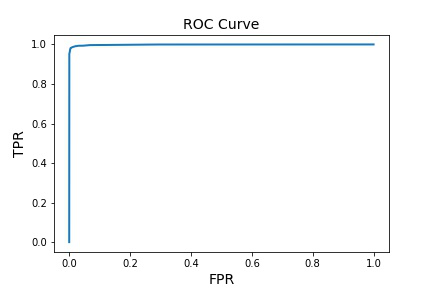

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate_attention(conf, 
                                                                        lfw, lfw_issame, 
                                                                        nrof_folds=10, tta=True, 
                                                                        attention=unit_attention)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)


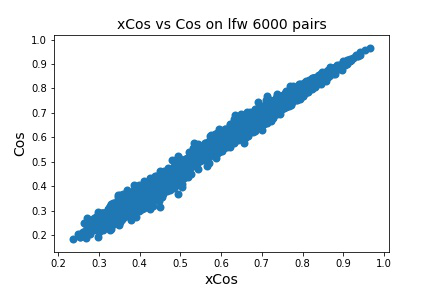

In [ ]:
corrPlot = learner.plot_CorrBtwXCosAndCos(conf, 
                                          lfw, lfw_issame, 
                                          nrof_folds=10, tta=True, 
                                          attention=unit_attention)
trans.ToPILImage()(corrPlot)

In [ ]:
# lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
# learner.plot_Examples(conf, 
#                       lfw, lfw_issame, 
#                       nrof_folds=10, tta=True, 
#                       attention=unit_attention,
#                       exDir=exdir)


In [ ]:
# Test patched Cos
exdir = 'cosPatchFtWithMs1M_uniAtten'
print('done')
#

done


In [ ]:
mdl_name = '2019-08-25-14-35_accuracy:0.9931666666666666_step:218349_None.pth'
learner.load_state(conf, mdl_name, model_only=True, from_save_folder=False, strict=True, model_atten=True)

lfw - accuray:0.9934999999999998, threshold:0.2280000000000011


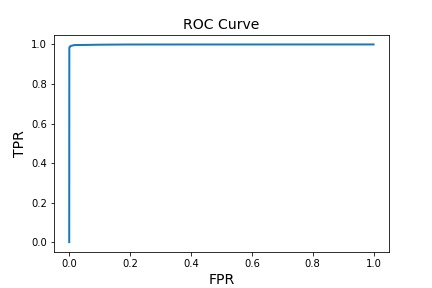

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate_attention(conf, 
                                                                        lfw, lfw_issame, 
                                                                        nrof_folds=10, tta=True, 
                                                                        attention=unit_attention)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

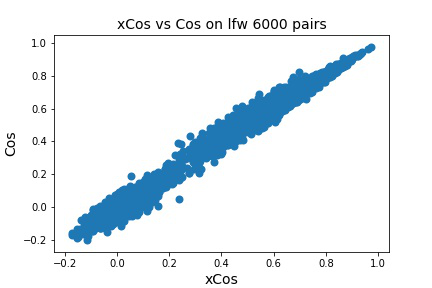

In [ ]:
corrPlot = learner.plot_CorrBtwXCosAndCos(conf, 
                                          lfw, lfw_issame, 
                                          nrof_folds=10, tta=True, 
                                          attention=unit_attention)
trans.ToPILImage()(corrPlot)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
learner.plot_Examples(conf, 
                      lfw, lfw_issame, 
                      nrof_folds=10, tta=True, 
                      attention=unit_attention,
                      exDir=exdir)


  0%|          | 0/6000 [00:00<?, ?it/s]/home/r07944011/.conda/envs/gpu/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/r07944011/.conda/envs/gpu/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
  0%|          | 20/6000 [00:21<1:46:48,  1.07s/it]/home/r07944011/.conda/envs/gpu/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 25%|██▌       | 1524/6000 [29:42<1:30:00

In [ ]:
input()

In [ ]:
# Test patched Cos
exdir = 'cosPatchFtWithMs1M_learnedAtten'

#

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate_attention(conf, 
                                                                        lfw, lfw_issame, 
                                                                        nrof_folds=10, tta=True, 
                                                                        attention=None)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
corrPlot = learner.plot_CorrBtwXCosAndCos(conf, 
                                          lfw, lfw_issame, 
                                          nrof_folds=10, tta=True, 
                                          attention=None)
trans.ToPILImage()(corrPlot)


In [ ]:
input()

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
conf.use_mobilfacenet = True

In [ ]:
learner = face_learner(conf, inference=True)

In [ ]:
learner.load_state(conf, 'mobilefacenet.pth', True, True)

In [ ]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)